#Deep Learning con Python
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

Preferiblemente realizar este ejemplo en jupyter local

In [1]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

#estructura
net = keras.models.Sequential()
net.add(layers.Embedding(max_features, 128,
                         input_length=max_len,
                         name='embed'))
net.add(layers.Conv1D(32, 7, activation='relu'))
net.add(layers.MaxPooling1D(5))
net.add(layers.Conv1D(32, 7, activation='relu'))
net.add(layers.GlobalMaxPooling1D())
net.add(layers.Dense(1))
net.summary()

#compilación
net.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])

17465344/17464789 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-train

In [2]:
#Creamos un directorio para los archivos de tensorboard
!mkdir my_log_dir

In [4]:
#entrenamos el modelo con un callback
callbacks=[
    keras.callbacks.TensorBoard(log_dir='my_log_dir',
                                histogram_freq=1,
                                embeddings_freq=1)
]

history = net   .fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/20
  1/157 [..............................] - ETA: 0s - loss: 7.3523 - acc: 0.4922WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
157/157 [==============================] - 67s 424ms/step - loss: 0.6443 - acc: 0.6727 - val_loss: 0.4365 - val_acc: 0.8398
Epoch 2/20
157/157 [==============================] - 66s 422ms/step - loss: 0.4317 - acc: 0.8550 - val_loss: 0.4674 - val_acc: 0.8548
Epoch 3/20
157/157 [==============================] - 66s 422ms/step - loss: 0.3854 - acc: 0.8815 - val_loss: 0.7752 - val_acc: 0.8148
Epoch 4/20
157/157 [==============================] - 66s 423ms/step - loss: 0.3275 - acc: 0.9082 - val_loss: 0.9250 - val_acc: 0.8084
Epoch 5/20
157/157 [==============================] - 66s 422ms/step - loss: 0.2831 - acc: 0.9247 - val

In [5]:
!tensorboard --logdir=my_log_dir #usar en jupyter local

2020-08-04 15:30:05.074537: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.3.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


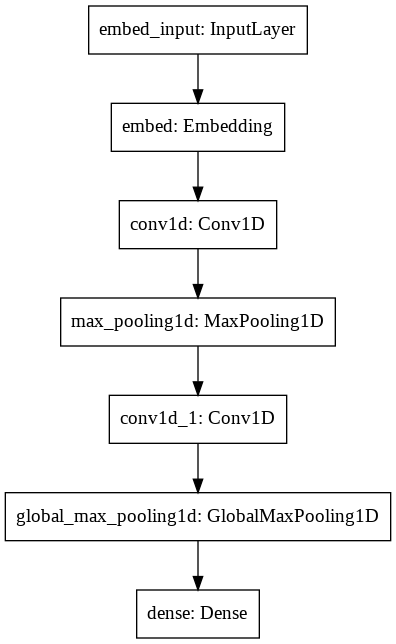

In [7]:
from keras.utils import plot_model
plot_model(net, to_file='modelo.png')

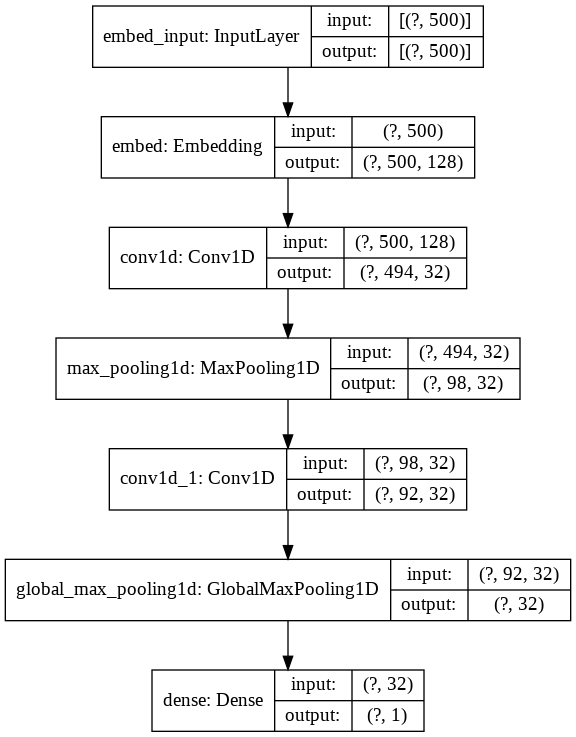

In [8]:
from keras.utils import plot_model
plot_model(net, show_shapes=True, to_file='modelo.png')